In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as plt

In [11]:
# Importing dataset using short_name as df3

df3=pd.read_csv("E:/Data/use data/csv/PT_crime_rates_by_per_million_passenger_journeys.csv")

In [12]:
df3.head()

,Month,Bus,Underground,Tramlink
0,04/09/22,11.3,13.3,17.4
1,05/09/22,11.1,14.6,18.1
2,06/09/22,11.1,13.1,17.4
3,07/09/22,11.2,12.5,16.3
4,08/09/22,9.7,13.2,17.4


In [13]:
#Checking null values
df3.isnull().sum()/len(df3)*100

Month          0.0
Bus            0.0
Underground    0.0
Tramlink       0.0
dtype: float64

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        132 non-null    object 
 1   Bus          132 non-null    float64
 2   Underground  132 non-null    float64
 3   Tramlink     132 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.2+ KB


<AxesSubplot:title={'center':'PT_crime_rates_by_per_million_passenger_journeys'}>

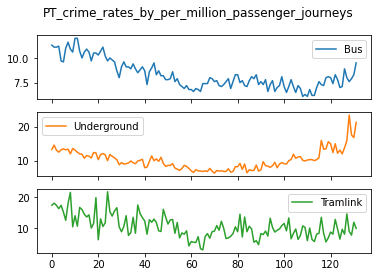

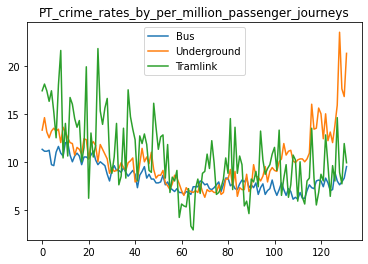

In [15]:
#Visualize the London_underground_average_monthly_temp
df3.plot.line(subplots = True, title='PT_crime_rates_by_per_million_passenger_journeys')
df3.plot(title='PT_crime_rates_by_per_million_passenger_journeys')

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bus'>

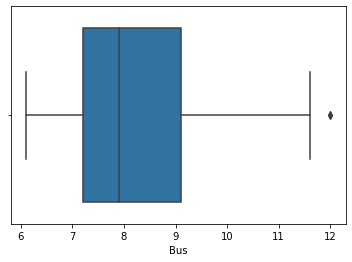

In [16]:
# Box Plot
import seaborn as sns
sns.boxplot(df3['Bus'])

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Underground'>

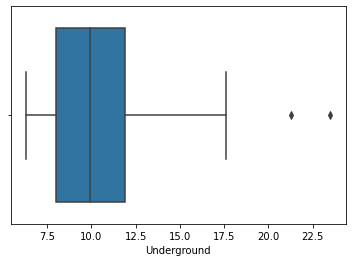

In [17]:
sns.boxplot(df3['Underground'])

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tramlink'>

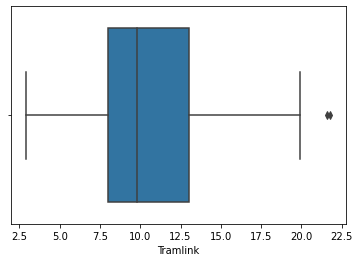

In [18]:
sns.boxplot(df3['Tramlink'])

In [19]:
#Data normalization
from sklearn import preprocessing
import numpy as np
a = np.random.random((1, 4))
a = a*20
print("Data = ", a)
# normalize the data attributes
normalized = preprocessing.normalize(a)
print("Normalized Data = ", normalized)

Data =  [[ 5.19176637 19.98598237  5.7282834   9.44831218]]
Normalized Data =  [[0.22168465 0.85338693 0.24459354 0.40343607]]


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

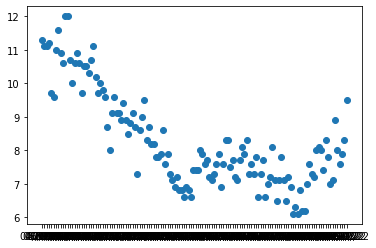

In [21]:
#visualise crime rates by passenger of Bus
plt.scatter(df3['Month'],df3['Bus'])

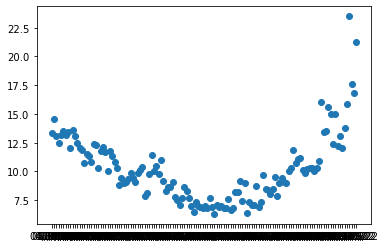

In [33]:
#visualise crime rates by passenger of Underground
plt.scatter(df3['Month'],df3['Underground'])

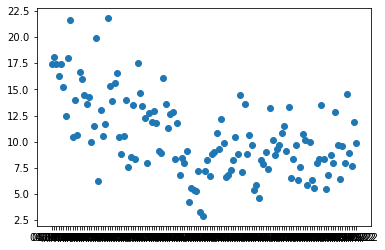

In [34]:
#visualise crime rates by passenger of Tramlink
plt.scatter(df3['Month'],df3['Tramlink'])

In [22]:
#Drop the Month, Underground, Tramlink columns
df3.drop(['Month','Underground','Tramlink'], axis = 1, inplace = True)
#Drop the bottom 2 columns
df3.drop(df3.tail(2).index,inplace=True)
print(df3)
print(df3.shape)

      Bus
0    11.3
1    11.1
2    11.1
3    11.2
4     9.7
..    ...
125   7.1
126   8.9
127   8.0
128   7.6
129   7.9

[130 rows x 1 columns]
(130, 1)


In [24]:
#Convert the data into numpy array
df3 = df3.to_numpy()
df3

array([[11.3],
       [11.1],
       [11.1],
       [11.2],
       [ 9.7],
       [ 9.6],
       [11. ],
       [11.6],
       [10.9],
       [10.6],
       [12. ],
       [12. ],
       [10.7],
       [10. ],
       [10.6],
       [10.9],
       [10.6],
       [ 9.7],
       [10.5],
       [10.5],
       [10.3],
       [10.7],
       [11.1],
       [10.2],
       [ 9.7],
       [10. ],
       [ 9.8],
       [ 9.6],
       [ 8.7],
       [ 8. ],
       [ 9.1],
       [ 9.6],
       [ 9.1],
       [ 9.1],
       [ 8.9],
       [ 9.4],
       [ 8.9],
       [ 8.5],
       [ 8.8],
       [ 9.1],
       [ 8.7],
       [ 7.3],
       [ 8.6],
       [ 9. ],
       [ 9.5],
       [ 8.3],
       [ 8.7],
       [ 8.2],
       [ 8.2],
       [ 7.8],
       [ 7.8],
       [ 7.9],
       [ 8.6],
       [ 7.6],
       [ 7.9],
       [ 7.3],
       [ 7.1],
       [ 6.9],
       [ 7.2],
       [ 6.8],
       [ 6.8],
       [ 6.6],
       [ 6.9],
       [ 6.8],
       [ 6.6],
       [ 7.4],
       [ 7

In [25]:
#From the dataset, separate into training and testing data with 80/20 percentile
dataset_train = np.array(df3[:int(df3.shape[0]*0.8)])
dataset_test = np.array(df3[int(df3.shape[0]*0.8):])
#Find number of columns for each dataset
print(dataset_train.shape)
print(dataset_test.shape)

(104, 1)
(26, 1)


In [27]:
#Scale the data to range[0,1]
#MinMaxScalar subtracts the minimum value in each feature and divides by the range(diff
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
train_data = scalar.fit_transform(dataset_train)
train_data.shape

(104, 1)

In [28]:
#Declare the x_train and y_train
x_train = train_data[0:98]
y_train = train_data[1:99]
x_train = np.reshape(x_train, (98,1,1))
x_train.shape

(98, 1, 1)

In [29]:
#Importing Inmportant libraries
import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
#Instantiate the Sequential model class
model = Sequential()
#Set the number of neurons/nodes with the units parameter
#Return_sequences=True reflects adding more layers
model.add(LSTM(units=98, return_sequences=True, input_shape=(None, 1)))
#Add dropout to reduce over-fitting
model.add(Dropout(0.2))
model.add(LSTM(units=98, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=98, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=98))
model.add(Dropout(0.2))
#Add dense layer to reduce spacial parameters of the vector
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 98)          39200     
                                                                 
 dropout (Dropout)           (None, None, 98)          0         
                                                                 
 lstm_1 (LSTM)               (None, None, 98)          77224     
                                                                 
 dropout_1 (Dropout)         (None, None, 98)          0         
                                                                 
 lstm_2 (LSTM)               (None, None, 98)          77224     
                                                                 
 dropout_2 (Dropout)         (None, None, 98)          0         
                                                                 
 lstm_3 (LSTM)               (None, 98)                7

In [30]:
#Compile the model
model.compile(optimizer = 'adam', loss = "mean_squared_error")

In [31]:
#Train the model for 100 epochs with 32 training examples used in each iteration
model.fit(x_train, y_train, epochs = 100, batch_size = 98)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.2127
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2090
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2052
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2013
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1975
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1932
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1891
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.1844
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 0.1798
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.1748
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 0.1696
Epoch 12/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1639
Epoch 13/100
1/1 [==============================] - 0

In [32]:
#Display the testing dataset
print(dataset_test)
print(dataset_test.shape)

[[7.1]
 [6.5]
 [7.2]
 [6.9]
 [6.1]
 [6.3]
 [6.1]
 [6.8]
 [6.2]
 [6.2]
 [7. ]
 [7.6]
 [7.3]
 [7.2]
 [8. ]
 [8.1]
 [8. ]
 [7.4]
 [8.3]
 [7.8]
 [7. ]
 [7.1]
 [8.9]
 [8. ]
 [7.6]
 [7.9]]
(26, 1)


In [34]:
#Reshape the training data and scale
inputs = np.reshape(scalar.transform(dataset_test), (26,1,1))
#Reverse the scaled predictions to their original values
Bus_CrimeRate_prediction = scalar.inverse_transform(model.predict(inputs))
Bus_CrimeRate_prediction

array([[7.262485 ],
       [6.9052033],
       [7.3259397],
       [7.138997 ],
       [6.6880503],
       [6.7946157],
       [6.6880503],
       [7.078927 ],
       [6.7408385],
       [6.7408385],
       [7.200177 ],
       [7.591584 ],
       [7.3905587],
       [7.3259397],
       [7.877025 ],
       [7.9516153],
       [7.877025 ],
       [7.456361 ],
       [8.104801 ],
       [7.731756 ],
       [7.200177 ],
       [7.262485 ],
       [8.597679 ],
       [7.877025 ],
       [7.591584 ],
       [7.803745 ]], dtype=float32)

In [35]:
Bus_CrimeRate_prediction = np.squeeze(Bus_CrimeRate_prediction)
Bus_CrimeRate_prediction

array([7.262485 , 6.9052033, 7.3259397, 7.138997 , 6.6880503, 6.7946157,
       6.6880503, 7.078927 , 6.7408385, 6.7408385, 7.200177 , 7.591584 ,
       7.3905587, 7.3259397, 7.877025 , 7.9516153, 7.877025 , 7.456361 ,
       8.104801 , 7.731756 , 7.200177 , 7.262485 , 8.597679 , 7.877025 ,
       7.591584 , 7.803745 ], dtype=float32)

In [36]:
Bus_CrimeRate_prediction = Bus_CrimeRate_prediction.reshape(-1,1)
Bus_CrimeRate_prediction

array([[7.262485 ],
       [6.9052033],
       [7.3259397],
       [7.138997 ],
       [6.6880503],
       [6.7946157],
       [6.6880503],
       [7.078927 ],
       [6.7408385],
       [6.7408385],
       [7.200177 ],
       [7.591584 ],
       [7.3905587],
       [7.3259397],
       [7.877025 ],
       [7.9516153],
       [7.877025 ],
       [7.456361 ],
       [8.104801 ],
       [7.731756 ],
       [7.200177 ],
       [7.262485 ],
       [8.597679 ],
       [7.877025 ],
       [7.591584 ],
       [7.803745 ]], dtype=float32)

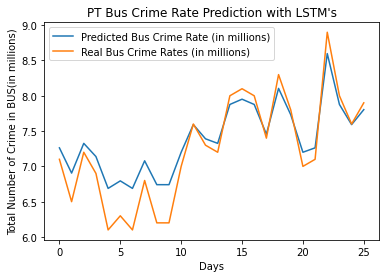

In [37]:
#Graph the real stock prices against the model's prediction
plt.plot(Bus_CrimeRate_prediction, label = 'Predicted Bus Crime Rate (in millions)', linewidth = 1.5)
plt.plot(dataset_test, label = 'Real Bus Crime Rates (in millions)', linewidth = 1.5)
plt.title("PT Bus Crime Rate Prediction with LSTM's")
plt.xlabel('Days')
plt.ylabel('Total Number of Crime in BUS(in millions)')
plt.legend()
plt.show()